# DATASET PRE-PROCESSING

This code was used to perform section 3.2. It includes sentence deletion by length, gender swapping, name deletion and random subset selection to extract the final BUG 50k.

In [ ]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd

In [ ]:
#balanced_df = pd.read_csv("data 2/balanced_BUG.csv")
full_df = pd.read_csv("data 2/full_bug.csv")
#gold_df = pd.read_csv("data 2/gold_BUG.csv")

/var/folders/dk/qy9bk4_94zsb04lj0tpx7vx40000gn/T/ipykernel_55917/4290403674.py:2: DtypeWarning: Columns (9,16,17,19,20,21,22,23,25,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv("data 2/full_bug.csv")


### 1. EDA

In [ ]:
full_df.head()

,Unnamed: 0,sentence_id,profession,g,profession_first_index,profession_last_index,g_first_index,g_last_index,sentence_text,paragraph_text,...,pubmed_id,msft_id,mesh_list,journal_title,volume,issue,stereotype,distance,num_of_pronouns,predicted gender
0,34,26632,chief,his,45,45,53,53,"In July 1919 , as a result of the scandalous ""...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,8,1,male
1,59,41801,student,her,4,4,19,19,"In 2014 , another student , Kan Wing Yi , was ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,15,1,female
2,217,146709,agent,his,10,10,16,16,"In the 2019 documentary "" McMillions "" , retir...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,6,1,male
3,225,152476,auditor,her,8,8,15,15,Guam 's first elected non - partisan public au...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,7,1,female
4,249,168655,guide,his,18,18,28,28,"His death was announced in a "" New York Times ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,10,2,male


In [ ]:
print(full_df.columns)

Index(['Unnamed: 0', 'sentence_id', 'profession', 'g',
       'profession_first_index', 'profession_last_index', 'g_first_index',
       'g_last_index', 'sentence_text', 'paragraph_text', 'collection',
       'languages', 'authors', 'file', 'data_index', 'corpus', 'title',
       'article_link', 'year', 'journal', 'source', 'section', 'pmc_id', 'doi',
       'pdf_sha', 'pubmed_id', 'msft_id', 'mesh_list', 'journal_title',
       'volume', 'issue', 'stereotype', 'distance', 'num_of_pronouns',
       'predicted gender'],
      dtype='object')


In [ ]:
print(full_df['sentence_text'].isnull().sum())

0


In [ ]:
# Print the first 10 sentences
for i, sentence in enumerate(full_df["sentence_text"][:10]):
    print(f"Sentence {i+1}: {sentence}\n")

Sentence 1: In July 1919 , as a result of the scandalous " affair " of the Field Headquarters of the Republic 's Revolutionary Military Council , which became a manifestation of the political struggle of the groups in the Bolshevik elite , commander - in - chief Vatsetis was deposed and arrested along with his closest associates .

Sentence 2: In 2014 , another student , Kan Wing Yi , was awarded second place in the Intel ISEF for her invention of biodegradable bandages .

Sentence 3: In the 2019 documentary " McMillions " , retired FBI agent Douglas Astralaga is interviewed regarding his involvement in the investigation of fraud regarding McDonald 's Monopoly in the bureau 's Mobile office .

Sentence 4: Guam 's first elected non - partisan public auditor Doris Flores Brookes was elected to her fourth term in 2016 .

Sentence 5: His death was announced in a " New York Times " obituary : " Christian Kaufmann , Swiss guide , who was well - known in Canada for his mountain - climbing fea

### Sentence length

In [ ]:
#Generate a new column of the df, "tokens", which has all the words in the sentence
full_df["tokens"] = full_df["sentence_text"].apply(lambda x: x.split())

# Print the first 10 sentences
for i, sentence in enumerate(full_df["tokens"][:10]):
    print(f"Sentence {i+1}: {sentence}\n")

Sentence 1: ['In', 'July', '1919', ',', 'as', 'a', 'result', 'of', 'the', 'scandalous', '"', 'affair', '"', 'of', 'the', 'Field', 'Headquarters', 'of', 'the', 'Republic', "'s", 'Revolutionary', 'Military', 'Council', ',', 'which', 'became', 'a', 'manifestation', 'of', 'the', 'political', 'struggle', 'of', 'the', 'groups', 'in', 'the', 'Bolshevik', 'elite', ',', 'commander', '-', 'in', '-', 'chief', 'Vatsetis', 'was', 'deposed', 'and', 'arrested', 'along', 'with', 'his', 'closest', 'associates', '.']

Sentence 2: ['In', '2014', ',', 'another', 'student', ',', 'Kan', 'Wing', 'Yi', ',', 'was', 'awarded', 'second', 'place', 'in', 'the', 'Intel', 'ISEF', 'for', 'her', 'invention', 'of', 'biodegradable', 'bandages', '.']

Sentence 3: ['In', 'the', '2019', 'documentary', '"', 'McMillions', '"', ',', 'retired', 'FBI', 'agent', 'Douglas', 'Astralaga', 'is', 'interviewed', 'regarding', 'his', 'involvement', 'in', 'the', 'investigation', 'of', 'fraud', 'regarding', 'McDonald', "'s", 'Monopoly', '

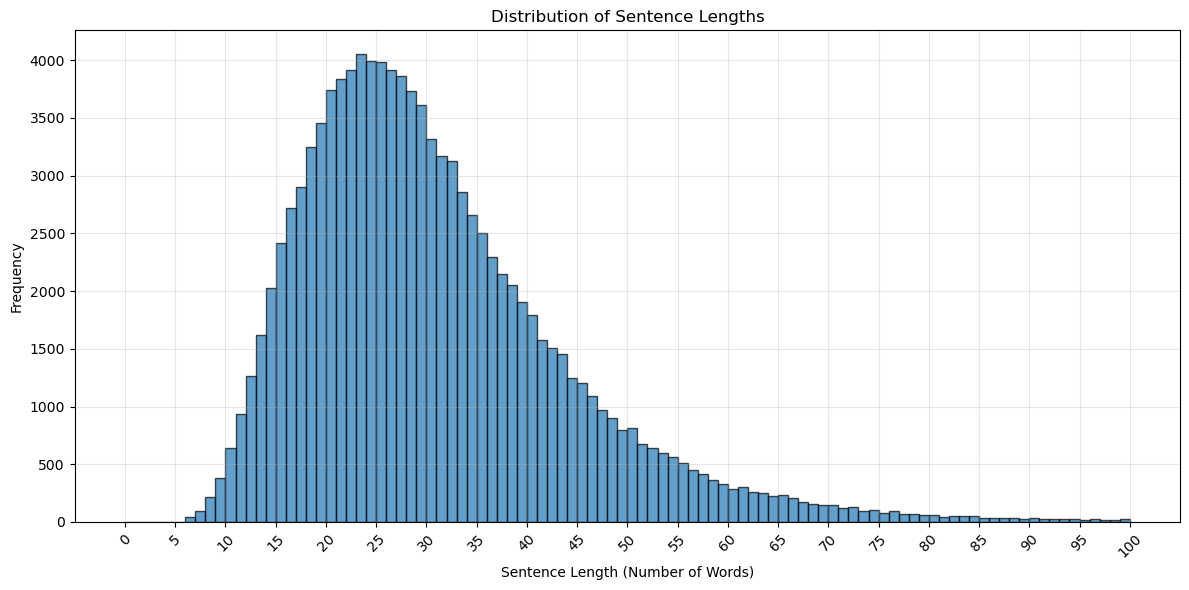

In [ ]:
#get distribution of sentence lengths
# run once to change tokens column to list instead of string

import matplotlib.pyplot as plt
import numpy as np

full_df["sentence_length"] = full_df["tokens"].apply(len)


# Plot distribution of sentence lengths without grouping into buckets of 5
plt.figure(figsize=(12, 6))

# Set the bin edges to every sentence length, use np.arange to cover all possible lengths
plt.hist(full_df["sentence_length"], bins=np.arange(0, full_df["sentence_length"].max() + 1, 1), edgecolor="black", alpha=0.7)

# Customize x-axis ticks for readability
plt.xticks(np.arange(0, full_df["sentence_length"].max() + 1, 5), rotation=45)  # Adjust tick interval (e.g., every 5 words)

# Add labels and title
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()  # To make sure everything fits in the plot
plt.show()

In [ ]:
# 1. Mean sentence length
mean_length = full_df["sentence_length"].mean()

# 2. Most frequent sentence length (mode)
most_frequent_length = full_df["sentence_length"].mode()[0]

# 3. Frequency of each sentence length
top_5_frequent_lengths = full_df["sentence_length"].value_counts().head(5)

# Output the results
print(f"Mean Sentence Length: {mean_length}")
print(f"Most Frequent Sentence Length: {most_frequent_length}")
print(f"Top 5 Most Frequent Sentence Lengths (by frequency):\n{top_5_frequent_lengths}")


Mean Sentence Length: 30.25642845947466
Most Frequent Sentence Length: 23
Top 5 Most Frequent Sentence Lengths (by frequency):
sentence_length
23    4056
24    3996
25    3987
22    3915
26    3912
Name: count, dtype: int64


#### Preprocess the text

In [ ]:
#First we extract all pronouns from column 'g', to create a mapping for the swap
unique_pronouns = full_df["g"].unique()
print("Unique Pronouns in 'g' column:", unique_pronouns)

Unique Pronouns in 'g' column: ['his' 'her' 'Her' 'His' 'himself' 'herself' 'HIS' 'HER' 'Himself'
 'Herself' 'he' 'she' 'He' 'She' 'HE']


In [ ]:
#lower case
full_df["sentence_text"] = full_df["sentence_text"].apply(lambda x: x.lower())
full_df["tokens"] = full_df["tokens"].apply(lambda tokens: [word.lower() for word in tokens])
full_df["g"] = full_df["g"].apply(lambda x: x.strip().lower())

# Verify the result (showing the first few rows of the relevant columns)
print(full_df[["sentence_text", "tokens", "g"]].head())

                                       sentence_text  \
0  in july 1919 , as a result of the scandalous "...   
1  in 2014 , another student , kan wing yi , was ...   
2  in the 2019 documentary " mcmillions " , retir...   
3  guam 's first elected non - partisan public au...   
4  his death was announced in a " new york times ...   

                                              tokens    g  
0  [in, july, 1919, ,, as, a, result, of, the, sc...  his  
1  [in, 2014, ,, another, student, ,, kan, wing, ...  her  
2  [in, the, 2019, documentary, ", mcmillions, ",...  his  
3  [guam, 's, first, elected, non, -, partisan, p...  her  
4  [his, death, was, announced, in, a, ", new, yo...  his  


In [ ]:
#check unique pronouns again
unique_pronouns = full_df["g"].unique()
print("Unique Pronouns in 'g' column:", unique_pronouns)

Unique Pronouns in 'g' column: ['his' 'her' 'himself' 'herself' 'he' 'she']


In [ ]:
# digits to words:
!pip install inflect

In [ ]:
import inflect

p = inflect.engine()

def convert_digits_to_words(sentence):
    return ' '.join([p.number_to_words(word) if word.isdigit() else word for word in sentence.split()])

def convert_digits_in_tokens(tokens):
    return [p.number_to_words(word) if word.isdigit() else word for word in tokens]

full_df['sentence_text'] = full_df['sentence_text'].apply(convert_digits_to_words)
full_df['tokens'] = full_df['tokens'].apply(convert_digits_in_tokens)

# Check the result (first few rows)
full_df[['sentence_text', 'tokens']].head()

,sentence_text,tokens
0,"in july one thousand, nine hundred and ninetee...","[in, july, one thousand, nine hundred and nine..."
1,"in two thousand and fourteen , another student...","[in, two thousand and fourteen, ,, another, st..."
2,"in the two thousand and nineteen documentary ""...","[in, the, two thousand and nineteen, documenta..."
3,guam 's first elected non - partisan public au...,"[guam, 's, first, elected, non, -, partisan, p..."
4,"his death was announced in a "" new york times ...","[his, death, was, announced, in, a, "", new, yo..."


In [ ]:
full_df_preprocessed = full_df.copy()

#### Distributions

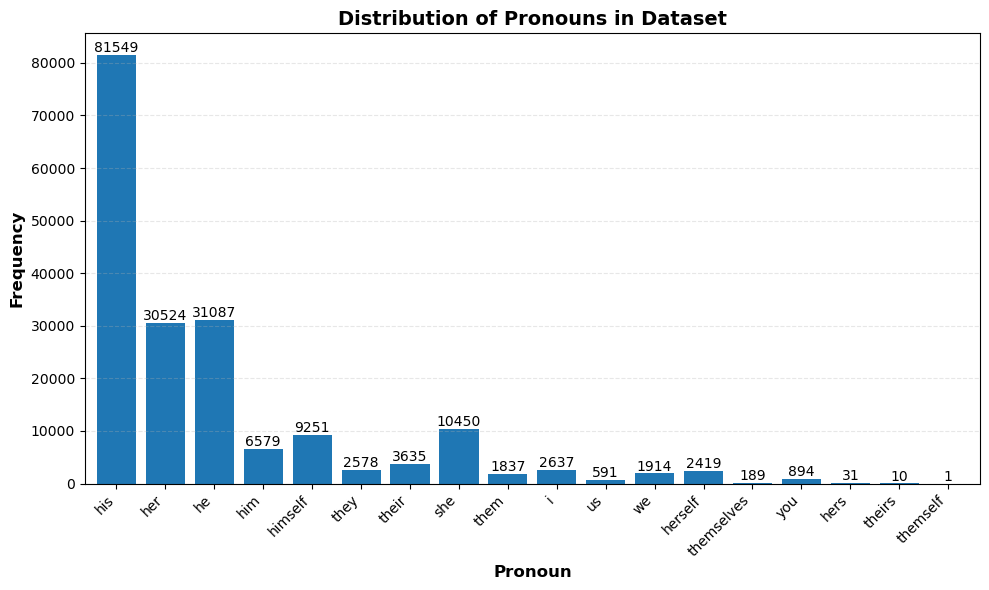

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#contains at least the pronouns as given in column 'g'
pronouns_list = ['he', 'she', 'his', 'her', 'him', 'hers', 'himself', 'herself',
                 'he\'s', 'she\'s', 'he\'ll', 'she\'ll', 'they', 'them', 'they\'re',
                 'their', 'theirs', 'themself', 'themselves', 'i', 'you', 'we', 'us']

all_pronouns = []

for tokens in full_df["tokens"]:
    pronouns_in_sentence = [word for word in tokens if word in pronouns_list]
    all_pronouns.extend(pronouns_in_sentence)

pronoun_counts = Counter(all_pronouns)

plt.figure(figsize=(10, 6))

ax = pd.Series(pronoun_counts).plot(kind='bar', color='#1f77b4', width=0.8)  # Darker blue

plt.xlabel('Pronoun', fontsize=12, weight='bold', color='black')
plt.ylabel('Frequency', fontsize=12, weight='bold', color='black')
plt.title('Distribution of Pronouns in Dataset', fontsize=14, weight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Improve readability
plt.yticks(fontsize=10, color='black')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

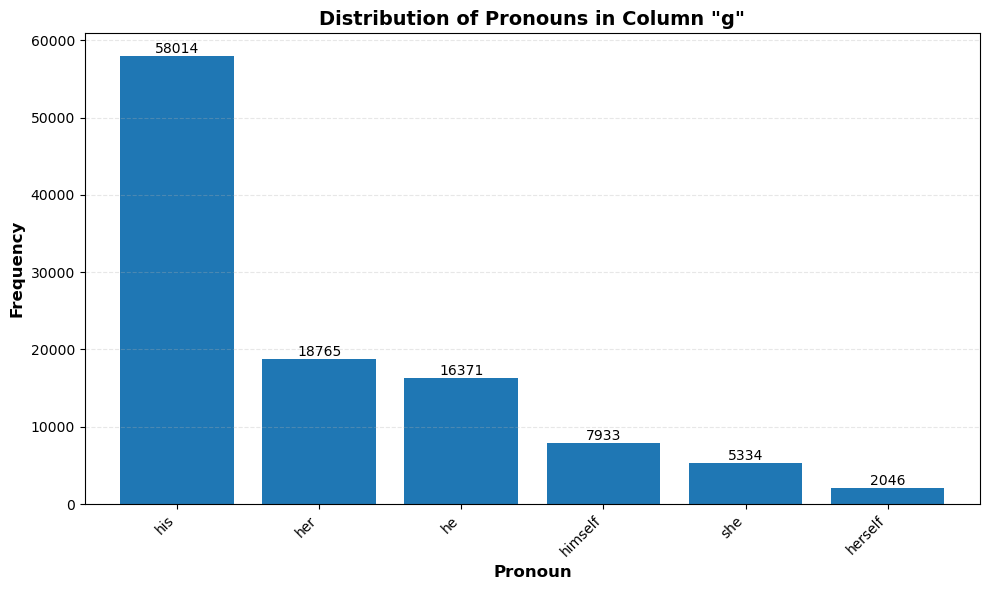

In [ ]:
# Count the frequency of each pronoun in column 'g'
pronoun_counts_g = full_df['g'].value_counts()

# Plot the distribution of pronouns in column 'g'
plt.figure(figsize=(10, 6))  # Adjusted size

# Plot the distribution with a solid blue color (same as before)
ax = pronoun_counts_g.plot(kind='bar', color='#1f77b4', width=0.8)

# Add labels and title with all text in black
plt.xlabel('Pronoun', fontsize=12, weight='bold', color='black')
plt.ylabel('Frequency', fontsize=12, weight='bold', color='black')
plt.title('Distribution of Pronouns in Column "g"', fontsize=14, weight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Improve readability
plt.yticks(fontsize=10, color='black')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add the counts as labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

In [ ]:
#Compute gender balance in the dataset through the 'predicted_gender' column

feminine_count = full_df_preprocessed[full_df_preprocessed['predicted gender'] == "female"].shape[0]
masculine_count = full_df_preprocessed[full_df_preprocessed['predicted gender'] == "male"].shape[0]

# Calculate the total number of entries
total_count = feminine_count + masculine_count

percentage_feminine = (feminine_count / total_count) * 100
percentage_masculine = (masculine_count / total_count) * 100

# Print the results
print(f"Feminine Count: {feminine_count}")
print(f"Masculine Count: {masculine_count}")

print(f"Percentage of Feminine Entries: {percentage_feminine:.2f}%")
print(f"Percentage of Masculine Entries: {percentage_masculine:.2f}%")

Feminine Count: 26159
Masculine Count: 82304
Percentage of Feminine Entries: 24.12%
Percentage of Masculine Entries: 75.88%


In [ ]:
print(full_df_preprocessed.columns  )

Index(['Unnamed: 0', 'sentence_id', 'profession', 'g',
       'profession_first_index', 'profession_last_index', 'g_first_index',
       'g_last_index', 'sentence_text', 'paragraph_text', 'collection',
       'languages', 'authors', 'file', 'data_index', 'corpus', 'title',
       'article_link', 'year', 'journal', 'source', 'section', 'pmc_id', 'doi',
       'pdf_sha', 'pubmed_id', 'msft_id', 'mesh_list', 'journal_title',
       'volume', 'issue', 'stereotype', 'distance', 'num_of_pronouns',
       'predicted gender', 'tokens', 'sentence_length'],
      dtype='object')


### 2. Sentence Deletion by Length

In [ ]:
#Eliminate > 40 token sentences
full_df_preprocessed = full_df_preprocessed[full_df_preprocessed["sentence_length"] <= 40]

#Re-index
full_df_preprocessed.reset_index(drop=True, inplace=True)

print("Number of sentences after filtering:", len(full_df_preprocessed))
print("Number of nans in 'sentence_text' column:", full_df_preprocessed["sentence_text"].isnull().sum())
print(full_df_preprocessed["sentence_text"][0:10])

Number of sentences after filtering: 88473
Number of nans in 'sentence_text' column: 0
0    in two thousand and fourteen , another student...
1    in the two thousand and nineteen documentary "...
2    guam 's first elected non - partisan public au...
3    his death was announced in a " new york times ...
4    the music director deva was appreciated for hi...
5    on march eleven , two thousand and nineteen , ...
6    irish singer dolores o'riordan was renowned fo...
7    the text on the plaque says that damat ali - p...
8    ed hayes , the lawyer killian was modeled on ,...
9    donop acted as godfather to the writer p. g. w...
Name: sentence_text, dtype: object


In [ ]:
#Count number of sentences with less than 40 tokens
less_than_40_tokens = full_df_preprocessed[full_df_preprocessed["sentence_length"] <= 40]
print("Number of sentences with less than 40 tokens:", len(less_than_40_tokens))

Number of sentences with less than 40 tokens: 88473


### 3. Name deletion

In [ ]:
!pip install spacy

  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.4/634.4 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.2/774.2 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 18.6 MB/s eta 0:00:00a 0:00:01
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)


In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.0 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Load spaCy English model
import spacy
nlp = spacy.load("en_core_web_sm")


def extract_names(sentence):
    """Extracts person names from a sentence using spaCy."""
    doc = nlp(sentence)
    return [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

# Assuming subsampled_df_50000 is your DataFrame with a "sentence_text" column
full_df_preprocessed["detected_names"] = full_df_preprocessed["sentence_text"].apply(extract_names)

# Display a sample
print(full_df_preprocessed[["sentence_text", "detected_names"]].head())

# Count total number of detected names
count = 0
for names in full_df_preprocessed["detected_names"]:
    if names != []:
        count += len(names)

print(f"Total number of detected names: {count}")

#print 10 names
i = 0
for name in full_df_preprocessed["detected_names"]:
    if name != []:
        print(name[0])
        i += 1

    if i == 10:
        break

                                       sentence_text       detected_names
0  in two thousand and fourteen , another student...                   []
1  in the two thousand and nineteen documentary "...  [douglas astralaga]
2  guam 's first elected non - partisan public au...       [doris flores]
3  his death was announced in a " new york times ...                   []
4  the music director deva was appreciated for hi...               [deva]
Total number of detected names: 29503
douglas astralaga
doris flores
deva
phil cunningham
ed hayes
mark lawrence
dominique strauss - kahn
follis
johnny horton
david rose


In [ ]:
#Total number of sentences with names
count = 0

for names in full_df_preprocessed["detected_names"]:
    if names != []:
        count += 1

print(f"Total number of sentences with names: {count}")


Total number of sentences with names: 23866


In [ ]:
# Remove sentences with detected names
full_df_preprocessed = full_df_preprocessed[full_df_preprocessed["detected_names"].apply(len) == 0]
print("Number of sentences after removing sentences with detected names:", len(full_df_preprocessed))

for name in full_df_preprocessed["detected_names"]:
    if name != []:
        print(name)

# Re-index
full_df_preprocessed.reset_index(drop=True, inplace=True)

Number of sentences after removing sentences with detected names: 64607


### 4. Pronoun swapping

In [ ]:
pronoun_swap = {
    'he': 'she', 'she': 'he', 'him': 'her', 'her': 'him',
    'his': 'her', 'hers': 'his', 'himself': 'herself',
    'herself': 'himself'
}

gender_swap = {'male': 'female', 'female': 'male'}

In [ ]:
swapped_df = full_df_preprocessed.copy()

# Function to swap pronouns with dependency parsing (context-aware) for non-reflexive pronouns
def swap_pronouns_with_context(sentence):
    # Only apply spaCy's parsing if 'her' is in the sentence
    if 'her' in sentence:
        doc = nlp(sentence)  # Parse the sentence using spaCy

        swapped_sentence = []
        for token in doc:
            # If the token is a pronoun and we know its role (subject, object, possessive, etc.)
            if token.text in pronoun_swap:
                # Check if 'her' or 'his' are possessive or objective
                if token.dep_ == 'poss' and token.text == 'her':
                    swapped_sentence.append('his')
                elif token.dep_ == 'dobj' and token.text == 'her':
                    swapped_sentence.append('him')
                elif token.dep_ == 'poss' and token.text == 'his':
                    swapped_sentence.append('her')
                elif token.dep_ == 'dobj' and token.text == 'his':
                    swapped_sentence.append('him')
                else:
                    # Apply regular pronoun swap for non-reflexive pronouns
                    swapped_sentence.append(pronoun_swap.get(token.text, token.text))
            else:
                swapped_sentence.append(token.text)

        return ' '.join(swapped_sentence)
    else:
        # If 'her' is not in the sentence, just apply the regular swap
        words = sentence.split()
        swapped_sentence = [pronoun_swap.get(word, word) for word in words]
        return ' '.join(swapped_sentence)

# Apply the function to swap pronouns in the sentence text
swapped_df['sentence_text'] = swapped_df['sentence_text'].apply(swap_pronouns_with_context)

# Apply the same pronoun swap in the tokenized list (without spaCy, as we don't need context here)
def swap_pronouns_in_tokens(tokens):
    swapped_tokens = []
    for word in tokens:
        # For possessive pronouns like 'his' and 'her', make sure to swap them
        if word.lower() == 'his':
            swapped_tokens.append('her')
        elif word.lower() == 'her':
            swapped_tokens.append('his')
        else:
            # Apply regular pronoun swap for non-reflexive pronouns
            swapped_tokens.append(pronoun_swap.get(word, word))
    return swapped_tokens

swapped_df['tokens'] = swapped_df['tokens'].apply(swap_pronouns_in_tokens)



In [ ]:
#Find gendered words
gendered_words = [
    # Professions
    ("actor", "actress"),
    ("waiter", "waitress"),
    ("steward", "stewardess"),
    ("host", "hostess"),
    ("emperor", "empress"),
    ("prince", "princess"),
    ("duke", "duchess"),
    ("baron", "baroness"),
    ("god", "goddess"),
    ("hero", "heroine"),
    ("conductor", "conductress"),
    ("postman", "postwoman"),
    ("barman", "barmaid"),
    ("landlord", "landlady"),
    ("chairman", "chairwoman"),
    ("policeman", "policewoman"),
    ("fireman", "firewoman"),
    ("salesman", "saleswoman"),
    ("businessman", "businesswoman"),

    # Family & Relationship Terms
    ("husband", "wife"),
    ("father", "mother"),
    ("son", "daughter"),
    ("brother", "sister"),
    ("uncle", "aunt"),
    ("nephew", "niece"),

    # Titles & Roles
    ("king", "queen"),
    ("monk", "nun"),
    ("wizard", "witch"),
    ("lord", "lady"),
]

#Generate dictionary of swaps:
gendered_swap = {}

for word, swap in gendered_words:
    gendered_swap[word] = swap
    gendered_swap[swap] = word


def swap_gendered_words(sentence):

    words = sentence.split()
    swapped_sentence = [gendered_swap.get(word, word) for word in words]
    return ' '.join(swapped_sentence)

swapped_df['sentence_text'] = swapped_df['sentence_text'].apply(swap_gendered_words)


def swap_gendered_words_in_tokens(tokens):
    swapped_tokens = [gendered_swap.get(word, word) for word in tokens]
    return swapped_tokens

swapped_df['tokens'] = swapped_df['tokens'].apply(swap_gendered_words_in_tokens)

In [ ]:
# Apply the pronoun swap for the 'g' column (pronouns column)
swapped_df['g'] = swapped_df['g'].apply(lambda x: pronoun_swap.get(x, x))

# Apply the gender swap for predicted gender column
swapped_df['predicted gender'] = swapped_df['predicted gender'].apply(lambda x: gender_swap.get(x, x))

# Concatenate the original and swapped dataframes again (if needed)
full_df_swapped = pd.concat([full_df_preprocessed, swapped_df], ignore_index=True)

# Display the first few rows to verify the result
full_df_swapped[['sentence_text', 'tokens']].head()

,sentence_text,tokens
0,"in july one thousand, nine hundred and ninetee...","[in, july, one thousand, nine hundred and nine..."
1,"in two thousand and fourteen , another student...","[in, two thousand and fourteen, ,, another, st..."
2,"his death was announced in a "" new york times ...","[his, death, was, announced, in, a, "", new, yo..."
3,irish singer dolores o'riordan was renowned fo...,"[irish, singer, dolores, o'riordan, was, renow..."
4,a specialist hurdler he is best known for his ...,"[a, specialist, hurdler, he, is, best, known, ..."


In [ ]:
print(len(full_df_preprocessed)*2)
print(len(full_df_swapped))

151746
151746


In [ ]:
original_sentences = full_df_preprocessed.loc[0:10, ['sentence_text', 'predicted gender', 'num_of_pronouns']]
swapped_sentences = full_df_swapped.loc[len(full_df_preprocessed):len(full_df_preprocessed)+10, ['sentence_text', 'predicted gender']]

# Display both for comparison
comparison = pd.concat([original_sentences.reset_index(drop=True), swapped_sentences.reset_index(drop=True)], axis=1)
comparison.columns = ['Original Sentence', 'Original Gender', 'num_of_pronouns', 'Swapped Sentence', 'Swapped Gender']

comparison.head(11)  # Display rows 20-30 comparison

,Original Sentence,Original Gender,num_of_pronouns,Swapped Sentence,Swapped Gender
0,"in july one thousand, nine hundred and ninetee...",male,1,"in july one thousand, nine hundred and ninetee...",female
1,"in two thousand and fourteen , another student...",female,1,"in two thousand and fourteen , another student...",male
2,"his death was announced in a "" new york times ...",male,2,"her death was announced in a "" new york times ...",female
3,irish singer dolores o'riordan was renowned fo...,female,1,irish singer dolores o'riordan was renowned fo...,male
4,a specialist hurdler he is best known for his ...,male,3,a specialist hurdler she is best known for her...,female
5,the text on the plaque says that damat ali - p...,male,1,the text on the plaque says that damat ali - p...,female
6,donop acted as godfather to the writer p. g. w...,male,1,donop acted as godfather to the writer p. g. w...,female
7,"recruiting at plymouth was buoyant , and the t...",male,1,"recruiting at plymouth was buoyant , and the t...",female
8,only the house band personalities were missed ...,male,1,only the house band personalities were missed ...,female
9,"watase , the captain of the rescue squad of ro...",male,1,"watase , the captain of the rescue squad of ro...",female


In [ ]:
# Show original sentence (from the original dataframe)
original_sentence = full_df_preprocessed.loc[4, 'sentence_text']

# Show swapped sentence (from the swapped dataframe)
swapped_sentence = full_df_swapped.loc[len(full_df_preprocessed) + 4, 'sentence_text']

# Print both sentences
print("Original Sentence:")
print(original_sentence)

print("\nSwapped Sentence:")
print(swapped_sentence)

Original Sentence:
a specialist hurdler he is best known for his performances in the 2011–2012 national hunt season , when he won the gerry feilden hurdle at newbury in november before winning britain 's most prestigious hurdle race , the champion hurdle at cheltenham on thirteen march .

Swapped Sentence:
a specialist hurdler she is best known for her performances in the 2011–2012 national hunt season , when she won the gerry feilden hurdle at newbury in november before winning britain 's most prestigious hurdle race , the champion hurdle at cheltenham on thirteen march .


In [ ]:
# Load spaCy's English model (with minimal components for faster parsing)
nlp = spacy.load("en_core_web_sm")

# Your example sentence (this can be replaced with your sentence)
sentence = "patient a3 was observed by her mother to have a mild cough starting on march eleven, and however was afebrile and had no symptoms on and throughout admission."

# Parse the sentence with spaCy
doc = nlp(sentence)

# Print out tokens and their dependencies
for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dep: {token.dep_}")

Token: patient, POS: ADJ, Dep: compound
Token: a3, POS: NOUN, Dep: nsubjpass
Token: was, POS: AUX, Dep: auxpass
Token: observed, POS: VERB, Dep: ROOT
Token: by, POS: ADP, Dep: agent
Token: her, POS: PRON, Dep: poss
Token: mother, POS: NOUN, Dep: pobj
Token: to, POS: PART, Dep: aux
Token: have, POS: VERB, Dep: xcomp
Token: a, POS: DET, Dep: det
Token: mild, POS: ADJ, Dep: amod
Token: cough, POS: NOUN, Dep: nsubj
Token: starting, POS: VERB, Dep: ccomp
Token: on, POS: ADP, Dep: prep
Token: march, POS: PROPN, Dep: pobj
Token: eleven, POS: NUM, Dep: nummod
Token: ,, POS: PUNCT, Dep: punct
Token: and, POS: CCONJ, Dep: cc
Token: however, POS: ADV, Dep: advmod
Token: was, POS: AUX, Dep: conj
Token: afebrile, POS: ADJ, Dep: acomp
Token: and, POS: CCONJ, Dep: cc
Token: had, POS: VERB, Dep: conj
Token: no, POS: DET, Dep: det
Token: symptoms, POS: NOUN, Dep: dobj
Token: on, POS: ADP, Dep: prep
Token: and, POS: CCONJ, Dep: cc
Token: throughout, POS: ADP, Dep: conj
Token: admission, POS: NOUN, Dep: 

In [ ]:
num_rows = full_df_swapped.shape[0]
print(num_rows)

151746


In [ ]:
#Print sentences that have gendered words
indices_gender = []
for sentence in full_df_swapped["sentence_text"]:

    if len(indices_gender) < 10:
        for word in sentence.split():
            for gendered_word_pair in gendered_words:
                if word.lower() in gendered_word_pair:
                    indices_gender.append(full_df_swapped[full_df_swapped["sentence_text"] == sentence].index[0])
                    break

    else:
        break

#Print all sentences and their swaps
for i in indices_gender:
    print(f"Original Sentence {i}: {full_df_swapped.loc[i, 'sentence_text']}")
    print(f"Swapped Sentence {i}: {full_df_swapped.loc[len(full_df_preprocessed) + i, 'sentence_text']}\n")


Original Sentence 8: his father , an engineer , was killed in a car accident three months before his birth .
Swapped Sentence 8: her mother , an engineer , was killed in a car accident three months before her birth .

Original Sentence 25: a professional child actor , active from age six through seventeen , he is best known for his roles in the blockbuster feature films " yours , mine and ours " ( one thousand, nine hundred and sixty-eight ) and
Swapped Sentence 25: a professional child actress , active from age six through seventeen , she is best known for her roles in the blockbuster feature films " yours , mine and ours " ( one thousand, nine hundred and sixty-eight ) and

Original Sentence 27: the police officer was awarded the king 's police medal for bravery for his attempt to save their lives .
Swapped Sentence 27: the police officer was awarded the queen 's police medal for bravery for her attempt to save their lives .

Original Sentence 32: somabhai modi , modi 's brother , is

In [ ]:
np.concatenate((np.arange(3), np.arange(3)))

array([0, 1, 2, 0, 1, 2])

In [ ]:
#Compute original balance between male and female inputs


## 5. Sub-sample k instances

In [ ]:
# Subsample k instances
k = 5000

# Select random indices of the full_df_preprocessed dataframe
random_indices_preprocessed = np.random.choice(len(full_df_preprocessed), k, replace=False)
random_indices_swapped = random_indices_preprocessed + len(full_df_preprocessed)
random_indices_full = np.concatenate([random_indices_preprocessed, random_indices_swapped])

# Create the subsampled dataframe
subsampled_df_10000 = full_df_swapped.iloc[random_indices_full]

# Reset the index of the subsampled dataframe
subsampled_df_10000.reset_index(drop=True, inplace=True)

#Create id column before splitting; the id will be used to match the original and swapped sentences
#The first 5000 sentences will have id 0-4999, the next 5000 will have id 0-4999
subsampled_df_10000["id"] = np.concatenate((np.arange(k), np.arange(k)))

#Separate into male and female dataframes
subsampled_df_10k_males = subsampled_df_10000[subsampled_df_10000["predicted gender"] == "male"]
print(len(subsampled_df_10k_males))
subsampled_df_10k_females = subsampled_df_10000[subsampled_df_10000["predicted gender"] == "female"]
print(len(subsampled_df_10k_females))

#Save the subsampled dataframe to a CSV file
columns_to_save = ['sentence_text', 'tokens', 'g', 'num_of_pronouns', 'predicted gender', 'id']
subsampled_df_10k_males.to_csv("subsampled_BUG_10k_males.csv", index=False, columns=columns_to_save)
subsampled_df_10k_females.to_csv("subsampled_BUG_10k_females.csv", index=False, columns=columns_to_save)

5000
5000


/var/folders/dk/qy9bk4_94zsb04lj0tpx7vx40000gn/T/ipykernel_59616/1099803624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_df_10000["id"] = np.concatenate((np.arange(k), np.arange(k)))


In [ ]:
#Now subsample to 50k instances
k = 25000

# Select random indices of the full_df_preprocessed dataframe
random_indices_preprocessed = np.random.choice(len(full_df_preprocessed), k, replace=False)
random_indices_swapped = random_indices_preprocessed + len(full_df_preprocessed)
random_indices_full = np.concatenate([random_indices_preprocessed, random_indices_swapped])

# Create the subsampled dataframe
subsampled_df_50000 = full_df_swapped.iloc[random_indices_full]

# Reset the index of the subsampled dataframe
subsampled_df_50000.reset_index(drop=True, inplace=True)

#Create id column before splitting; the id will be used to match the original and swapped sentences
#The first 5000 sentences will have id 0-4999, the next 5000 will have id 0-4999
subsampled_df_50000["id"] = np.concatenate((np.arange(k), np.arange(k)))

#Separate into male and female dataframes
subsampled_df_50k_males = subsampled_df_50000[subsampled_df_50000["predicted gender"] == "male"]
print(len(subsampled_df_50k_males))
subsampled_df_50k_females = subsampled_df_50000[subsampled_df_50000["predicted gender"] == "female"]
print(len(subsampled_df_50k_females))

#Save the subsampled dataframe to a CSV file
columns_to_save = ['sentence_text', 'tokens', 'g', 'num_of_pronouns', 'predicted gender', 'id']
subsampled_df_50k_males.to_csv("subsampled_BUG_50k_males.csv", index=False, columns=columns_to_save)
subsampled_df_50k_females.to_csv("subsampled_BUG_50k_females.csv", index=False, columns=columns_to_save)

/var/folders/dk/qy9bk4_94zsb04lj0tpx7vx40000gn/T/ipykernel_46973/2675480269.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_df_50000["id"] = np.concatenate((np.arange(k), np.arange(k)))


25000
25000


In [ ]:
#Now save the full dataset
full_df_swapped["id"] = np.concatenate((np.arange(len(full_df_preprocessed)), np.arange(len(full_df_preprocessed))))

full_df_males = full_df_swapped[full_df_swapped["predicted gender"] == "male"]
print(len(full_df_males))
full_df_females = full_df_swapped[full_df_swapped["predicted gender"] == "female"]
print(len(full_df_females))

#Save the full dataframe to a CSV file
columns_to_save = ['sentence_text', 'tokens', 'g', 'num_of_pronouns', 'predicted gender', 'id']
full_df_males.to_csv("full_BUG_males.csv", index=False, columns=columns_to_save)
full_df_females.to_csv("full_BUG_females.csv", index=False, columns=columns_to_save)

75873
75873
